# Anomaly Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm as nm

Get data

In [4]:
data = pd.read_csv("data.csv") 
anomalies = pd.read_csv("anomalies.csv") 

See how data is distributed

Text(0,0.5,'Edad')

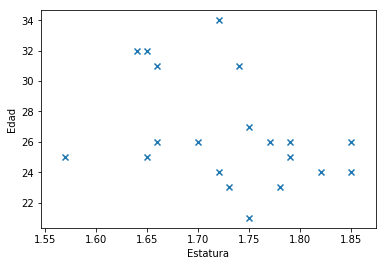

In [5]:
plt.scatter(data["Estatura"], data["Edad"], marker = "x")
plt.xlabel('Estatura')
plt.ylabel('Edad')

Fuctions to calculate Gauss Anomaly Detection

In [16]:

def meanAndSigma2(data):
    X = np.array(data)
    n = np.size(X, 1)
    m = np.size(X, 0)
    mean = np.zeros((n, 1))
    sigma2 = np.zeros((n, 1))
    
    mean = np.reshape((1/m)*np.sum(X, 0), (1, n))
    sigma2 = np.reshape((1/m)*np.sum(np.power((X - mean),2), 0),(1, n))
    
    return mean, sigma2



def detectAnomaly(data, epsilon):
    mean, sigma2 = meanAndSigma2(data)
    probability = nm.pdf(data, mean[0], np.sqrt(sigma2[0]))
    
    probability = probability[:,0] * probability[:,1]
    print(probability)
    for y in probability:
        if y < epsilon:
            print('Anomaly!')


Configure epsiolon as 0.001 (we neew a lower value, because the probability multiplication reduces the value)

In [17]:
detectAnomaly(data,0.001)

[0.53412563 0.27266106 0.47661513 0.29307514 0.10056365 0.17504029
 0.08580678 0.12294242 0.159363   0.16713014 0.37236586 0.40466773
 0.2227634  0.31522584 0.44184132 0.06131786 0.57417541 0.05234727
 0.39587025 0.60146926]


Any Anomaly detected with the training data

In [18]:
detectAnomaly(anomalies,0.001)

[9.33098963e-06 7.91472305e-06 2.51789742e-06 1.14165615e-05]
Anomaly!
Anomaly!
Anomaly!
Anomaly!


All anomalies were detected 